# Project Title - Analyzing Twitch Channel Data

## Downloading the Dataset

This Jupyter Notebook uses `opendatasets` module to download the dataset needed. The advantage of this is everytime the owner updates the dataset, the dataset in this notebook will also be updated when run again. The dataset will be downloaded everytime the specific cell is run. It will be placed in the same directory of this notebook.

The dataset is composed of 1000 Twitch Streamers with different data with columns:

| Column               | Description                                                           |
|----------------------|-----------------------------------------------------------------------|
| Channel              | Name of the streamers channel                                         |
| Watch time(Minutes)  | Watch time of the channel in minutes                                  |
| Stream time(minutes) | Stream time of the channel in minutes                                 |
| Peak viewers         | Highest number of viewers he/she had on their stream in the past year |
| Average viewers      | Amount of viewers a streamer had per stream                           |
| Followers            | Number of people following the channel                                |
| Followers gained     | Followers gained at the time of scrapping                             |
| Views gained         | Views gained at the time of scrapping                                 |
| Partnered            | (Boolean) Twitch Partnered [True] or Not [False]                      |
| Mature               | (Boolean) 18 years old [True] or below [False]                        |
| Language             | English, Korean, French, etc.                                         |


For more updated information you can go in this link: https://www.kaggle.com/aayushmishra1512/twitchdata

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/aayushmishra1512/twitchdata' # kaggle link of the dataset

In [4]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  aayushmishra1512/twitchdata


0it [00:00, ?it/s]

  0%|          | 0/37403 [00:01<?, ?it/s]

Extracting archive .\twitchdata.zip to .\twitchdata


The dataset has been downloaded and extracted.

In [5]:
data_dir = './twitchdata' # Directory of the dataset

In [6]:
import os
os.listdir(data_dir)

['twitchdata-update.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "analyzing-twitch-streamer-data" # Name of the project (in lowercase letters and hyphens)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


40960it [00:05, 7038.67it/s]             


[jovian] Updating notebook "201812311/analyzing-twitch-streamer-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/201812311/analyzing-twitch-streamer-data


'https://jovian.ml/201812311/analyzing-twitch-streamer-data'

## Data Preparation and Cleaning

Before performing any exploration or analysis in the dataset, it is always a good idea to prepare it and clean it so that any errors and outliers are handled. Performing this before the analysis will help us to focus later in just analyzing and not in fixing any issues that my arise.


Before we do anything, let's import every external python module we need in this notebook.

In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("./twitchdata/twitchdata-update.csv") # read the dataset relative to this notebook

> NOTE: It is always a good idea to give the "**Relative Path**" of the dataset for others to run it without issues. This allows us to run this notebook by any users in any device.

### Familiarizing with the Dataset

In this section, we are going to use different methods specializing in exploring the dataset to know more about the data that we are working on. This is done before the data cleaning to identify mis-labeled columns, wrong data types, "typo" errors and nulls to later clean it.

After we read the dataset in this notebook, let's familiarize ourselves in the dataset that we are working on by using the `head()` method. By default, this will display the first 5 rows of the dataset.

In [13]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


Let's also check how many rows, non-nulls and memory usage of the dataset by using the `info()` method. This method is handy when you need to look the overview of the metadata of the dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


This provides an overview of what we are dealing with. 

We can see some overview of information, let's break it down:
1. The dataset contains 1000 entries (0 - 999)
2. We have 11 columns (0 - 10)
3. We have 1000 entries that have non-null entries
4. We have 2 boolean, 7 integers and 2 strins
5. Our memory is only 72.4+ KB

To give emphasize on this information, I will provide another methods to accomplish this individually.

In [15]:
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

Here what we did is chained `isnull()` and `sum()` to find how many entries in each column have null values. We can see that we don't have any.

In [16]:
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

By using `dtypes`, we are provided with much detailed information about the data type of each column

Let's see the statistical side of our dataset. This is useful in understanding if there are any outliers in our data. Using `describe()` method we can see the  minimum value, maximum value, percentiles, etc. Let's check it out!

In [20]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In just one table, we can see a lot of information in an overview. This can help us identify unrealistic and uncommon data entry and later on, look at a much deeper perspective to understand it.

Let's look at `Followers gained` column with a minimum value of -15,772.

In [21]:
df[df["Followers gained"] ==  df["Followers gained"].min()]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
656,TSM_TheOddOne,181908120,188445,4363,913,864087,-15772,6370949,True,False,English


We can see here that someone might've lost a lot of Followers. Referring back to the description of this column, it seems that updated dataset, "**TSM_TheOddOne**" lost a lot of followers. 

Upon exploring, and familiarizing ourselves with the dataset, we didn't found any unclean data entry nor outliers present in the dataset, hence we are going forward in the analysis of this dataset.

To end this section, let's commit our changes to save our work.

In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "201812311/analyzing-twitch-streamer-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/201812311/analyzing-twitch-streamer-data


'https://jovian.ml/201812311/analyzing-twitch-streamer-data'

## Exploratory Analysis and Visualization

We are done cleaning our dataset. In this section we are ready to analyze and visualize important insights that the dataset  has and later on formulate a question based on what we have found.



Let's begin by initializing important design features that the visualization will use.

In [19]:
sns.set_style('darkgrid',  {"axes.facecolor": ".5"})
plt.style.use('dark_background')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Twitch Channel Maturity (Chart 1)

Next up! Let's check whether game streamers in our dataset are matured or not.

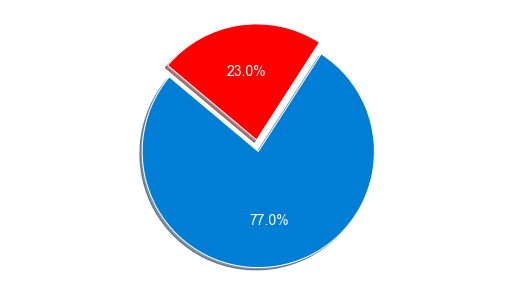

In [23]:
plt.pie(df.groupby("Mature").count()["Channel"].values,
        explode=[0.1, 0],
        labels=["Young", "Mature"], 
        colors=["#007ED6", "#FF0000"], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)

plt.axis("equal")
plt.show()

This indicates that our dataset composed of young lads. It's never too yearly nor too late to pursue our dreams I guess...

### Distribution of Partnership (Chart 2)

Next up! Let's look at the distribution if they are twitch partnered or not.

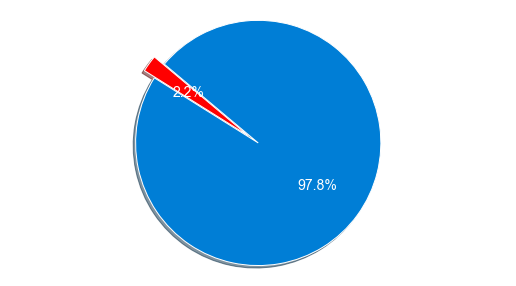

In [24]:
plt.pie(df.groupby("Partnered").count()["Channel"].values,
        explode=[0.1, 0],
        labels=["Not Partnered", "Partnered"], 
        colors=["#FF0000", "#007ED6"], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)

plt.axis("equal")
plt.show()

Almost all of the game streamers in our dataset seems to be partnered. Let's look at this in greater detail if they have more views or not.

### Twitch Channel "NOT" Partnered Followers Count (Chart 3)

Let's expand the insights that we have gained above and look at the `channels` that are not partnered with twitch and their `Followers` count.

c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-pac

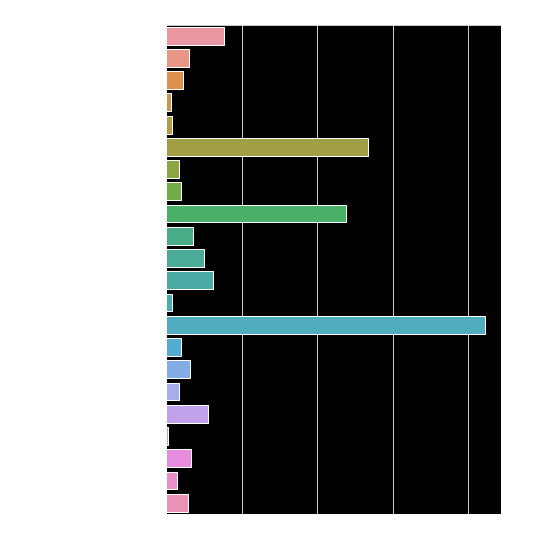

In [43]:
plt.figure(figsize=(6, 9))
plt.title("Comparison of the Most Number of Followers (Partnered)")
sns.barplot(x=df[df["Partnered"] == False]["Followers"], 
            y=df[df["Partnered"] == False]["Channel"],
            order=df[df["Partnered"] == False]["Channel"],
            orient="h")
plt.show()

"**CouRageJD**" outnumbered every game streamers by followers in our dataset by a huge margin.

### Twitch Channel Partnered Followers Count (Chart 4)

Since we have looked at the `channels` with the most followers that are not partnered, let's look at now the different channels and their number of followers that are partnered with twitch

c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-pac

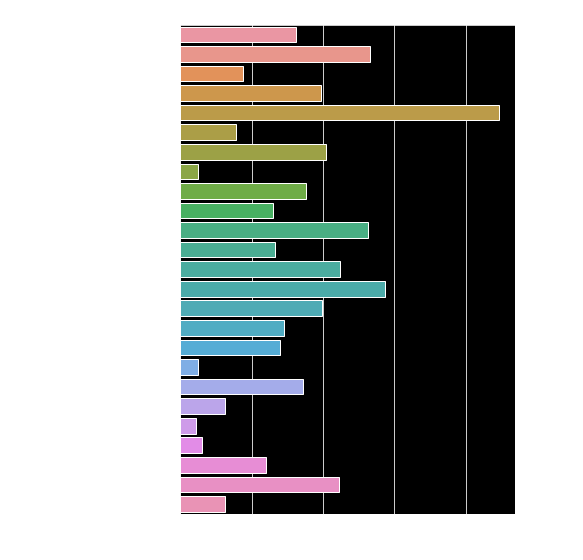

In [42]:
plt.figure(figsize=(6, 9))
plt.title("Comparison of the Most Number of Followers (Not Partnered)")
sns.barplot(x=df[df["Partnered"] == True]["Followers"].head(25), 
            y=df[df["Partnered"] == True]["Channel"].head(25),
            order=df[df["Partnered"] == True]["Channel"].head(25),
            orient="h")
plt.show()

"**Tfue**" must be a popular channel. Let's look at the mean `Followers` count and compare which of them has more `Followers` in general.

In [25]:
partnered = df[df['Partnered'] == True]['Followers'].sort_values(ascending=True).mean()

In [26]:
not_partnered = df[df['Partnered'] == False]['Followers'].sort_values(ascending=True).mean()

In [44]:
result = partnered > not_partnered # Comparing the mean values of partnered and not partnered twitch streamers
result = bool(result)
print("{} has greater mean values than {}".format("Partnered Twitch Streamers", "Not Partnered Twitch Streamers" if result else "Not Partnered Twitch Streamers", "Partnered Twitch Streamers"))

Partnered Twitch Streamers has greater mean values than Not Partnered Twitch Streamers


By looking at the mean values of partnered and not_partnered, we can conclude that partnered twitch streamers has more followers.
> NOTE: This doesn't prove that being a twitch partnered gains you a lot of followers.

Let us save and upload our work to Jovian before continuing

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "201812311/analyzing-twitch-streamer-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/201812311/analyzing-twitch-streamer-data


'https://jovian.ml/201812311/analyzing-twitch-streamer-data'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



### Q1: Since we have a `Language` column for each streamer about their language delivery. What is the most popular language delivert in Twitch? Second? Third?

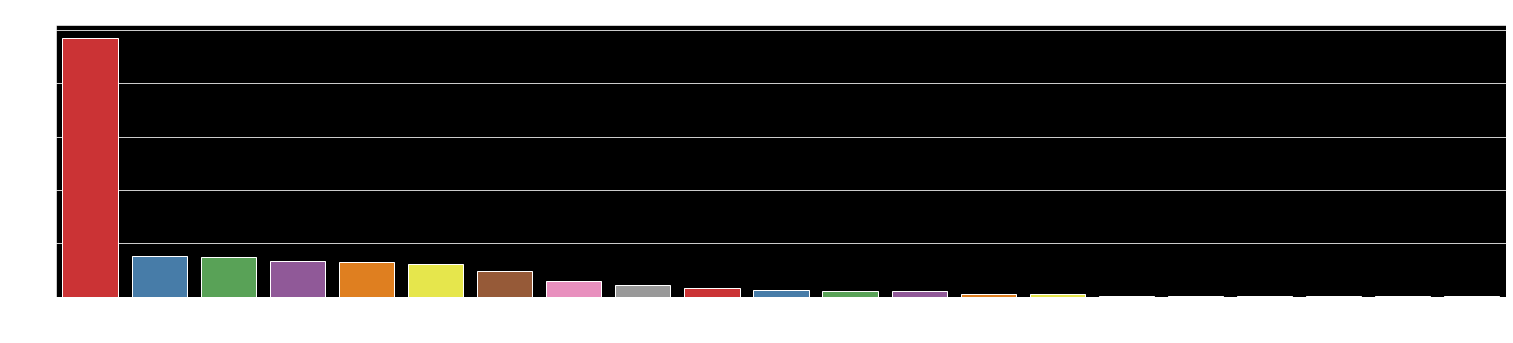

In [30]:
plt.figure(figsize=(26, 5))
plt.title("Top Language Delivery in Twitch")
plot = sns.countplot(x="Language", data=df, order=df["Language"].value_counts().index, palette="Set1")

### Q2: Next up! What are the stream time of the 25 most Followers Channels in our dataset? 

c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-pac

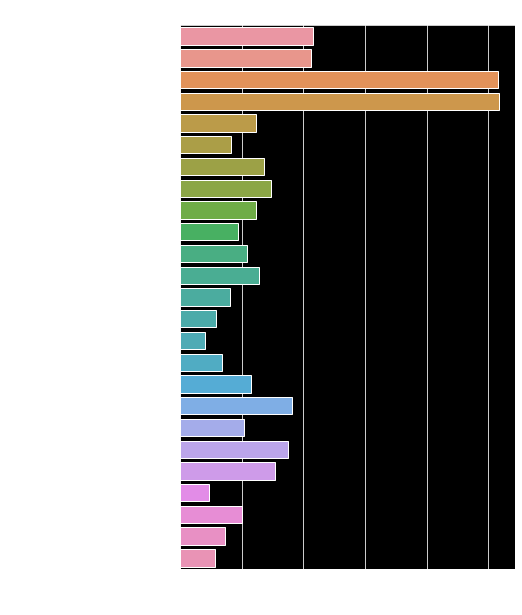

In [31]:
plt.figure(figsize=(6, 10))
sns.barplot(x=df["Stream time(minutes)"].head(25), 
            y=df["Channel"].head(25))
plt.title("Comparing Top 25 Stream time(minutes)")
plt.show()

We can see here that "**RelaxBeats**" has the most `Stream time(minutes)` in our top 25 Channels in the dataset.

### Q3: TODO - Lets look again the Top 25 of our dataset, this time: Top 25 Followers!

c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-pac

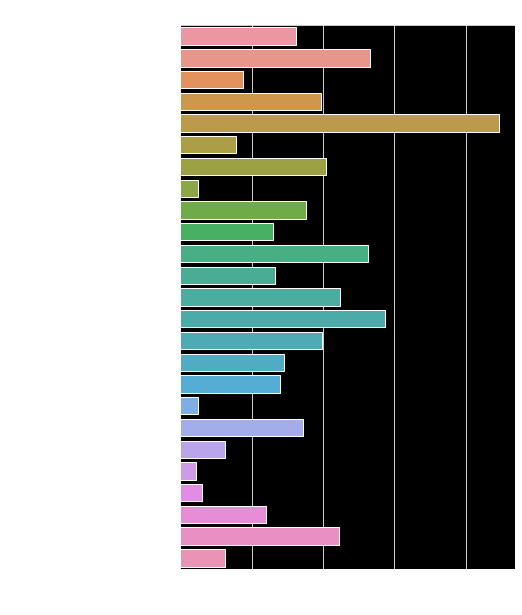

In [32]:
plt.figure(figsize=(6, 10))
sns.barplot(x=df["Followers"].head(25), 
            y=df["Channel"].head(25))
plt.title("Comparing Top 25 Followers")
plt.show()

### Q4: TODO - What are the Top 25 Views gained??

c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-pac

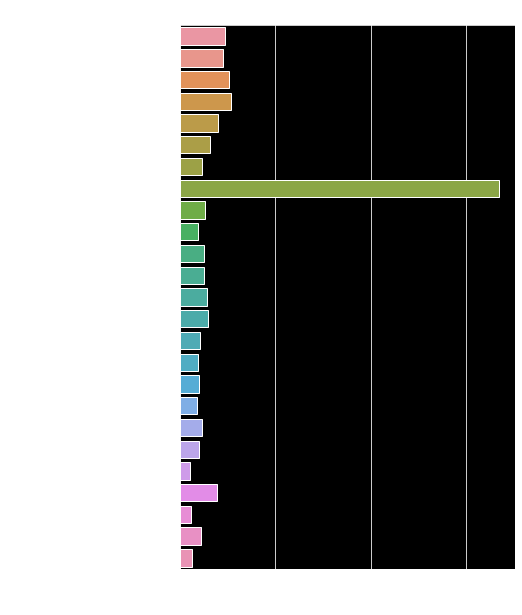

In [33]:
plt.figure(figsize=(6, 10))
sns.barplot(x=df["Views gained"].head(25), 
            y=df["Channel"].head(25))
plt.title("Comparing Top 25 Views gained")
plt.show()

### Q5: TODO - What are the Top 25 average views?

c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\princ\pycharmprojects\data analysis with python- zero to pandas\venv\lib\site-pac

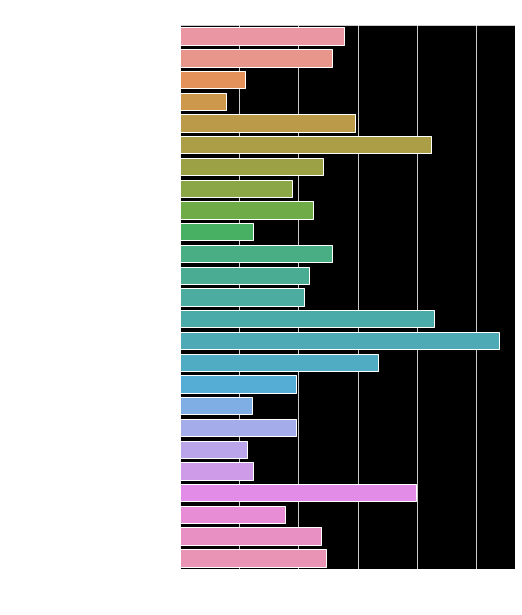

In [34]:
plt.figure(figsize=(6, 10))
sns.barplot(x=df["Average viewers"].head(25), 
            y=df["Channel"].head(25))
plt.title("Comparing Top 25 Average viewers")
plt.show()

Let us save and upload our work to Jovian before continuing.

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "201812311/analyzing-twitch-streamer-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/201812311/analyzing-twitch-streamer-data


'https://jovian.ml/201812311/analyzing-twitch-streamer-data'

## References and Future Work

It is clear that we haven't touched the relation of the question "Thus being partnered with Twitch will increase my Followers Count?" because this requires careful analysis and the skills that I have gained lacks the requirement to solve this question. 

Although I have only provided some statistics about the Top 25 Channels, the Future goal for this dataset is to answer the question stated above.

I would like to point out this three kaggle users as they helped me what to look for in this dataset.
1. https://www.kaggle.com/aayushmishra1512/twitch-top-streamers-data-eda
2. https://www.kaggle.com/darthmanav/twitch-streamers-data-analysis
3. https://www.kaggle.com/ravels1991/twitch-and-plotly-visualization

Before we finish this analysis, let's do a final save.

In [ ]:
import jovian

In [ ]:
jovian.commit()

jovian.commit()

In [46]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "201812311/analyzing-twitch-streamer-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/201812311/analyzing-twitch-streamer-data


'https://jovian.ml/201812311/analyzing-twitch-streamer-data'